## Daibetes Prediction

### Imporing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### Uploading the data into a dataframe

In [2]:
df = pd.read_csv('Diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Checking for the null Values

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Visualizing the data to find the insights

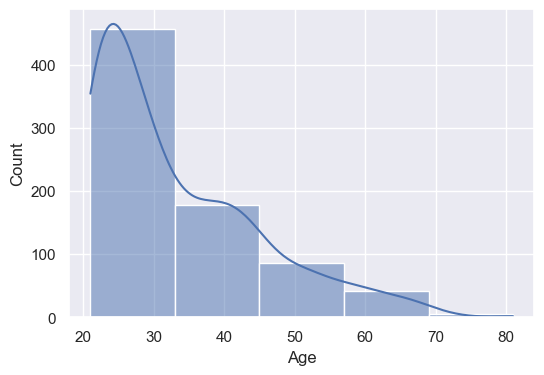

In [7]:

plt.figure(figsize=(6,4))

sns.set_theme(style = 'darkgrid')

sns.histplot(data = df, x = 'Age', bins= 5, kde=True)  

plt.show()


### Dealing with the outliers

<Axes: xlabel='BMI'>

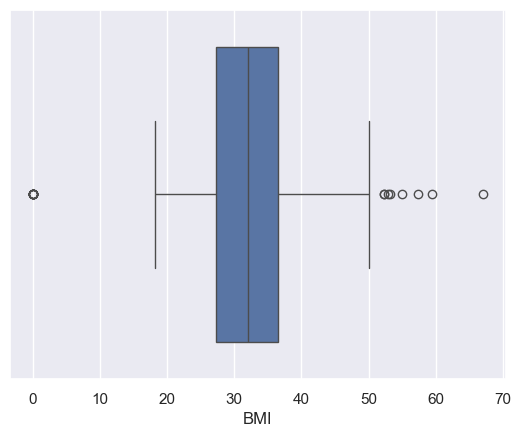

In [9]:
sns.boxplot(x=df['BMI'])

In [11]:
mn_Q1 = np.percentile(df['BMI'],25)

mn_Q3 = np.percentile(df['BMI'],75)


mn_IQR = mn_Q3-mn_Q1
mn_lower_range = mn_Q1 - (1.5*mn_IQR)
mn_upper_range = mn_Q3 + (1.5*mn_IQR)

print(mn_IQR)
print(mn_lower_range)
print(mn_upper_range)

9.3
13.35
50.550000000000004


In [12]:
df = df[(df['BMI'] > mn_lower_range) & (df['BMI'] < mn_upper_range)]
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,3.858478,120.965287,69.658211,20.628838,80.018692,32.204005,0.469355,33.349800,0.347130
std,3.364052,32.056207,18.002395,15.768581,113.974137,6.491385,0.322737,11.728681,0.476375
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,129.000000,36.500000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,50.000000,2.329000,81.000000,1.000000


<Axes: xlabel='BMI'>

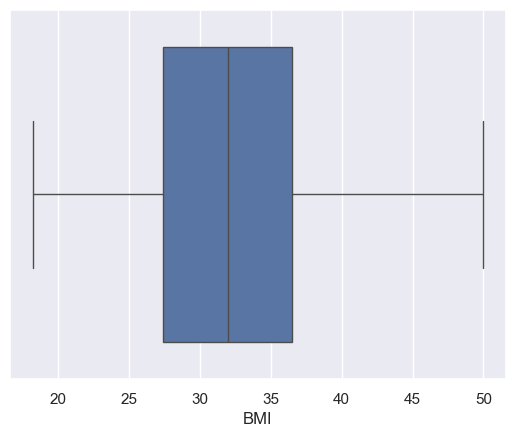

In [14]:
sns.boxplot(x=df['BMI'])

<Axes: xlabel='DiabetesPedigreeFunction'>

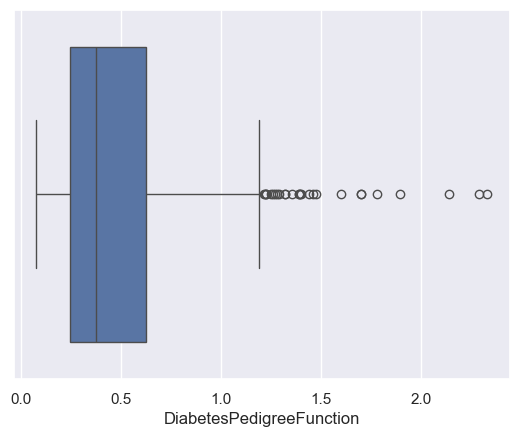

In [16]:
sns.boxplot(x=df['DiabetesPedigreeFunction'])

In [17]:
mn_Q1 = np.percentile(df['DiabetesPedigreeFunction'],25)

mn_Q3 = np.percentile(df['DiabetesPedigreeFunction'],75)


mn_IQR = mn_Q3-mn_Q1
mn_lower_range = mn_Q1 - (1.5*mn_IQR)
mn_upper_range = mn_Q3 + (1.5*mn_IQR)

print(mn_IQR)
print(mn_lower_range)
print(mn_upper_range)

0.382
-0.32899999999999996
1.1989999999999998


In [18]:
df = df[(df['DiabetesPedigreeFunction'] > mn_lower_range) & (df['DiabetesPedigreeFunction'] < mn_upper_range)]
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,3.872576,120.475069,69.569252,20.430748,78.416898,32.151247,0.430669,33.307479,0.337950
std,3.365872,31.732805,18.159451,15.790016,111.160400,6.493986,0.250340,11.761248,0.473339
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.238000,24.000000,0.000000
50%,3.000000,116.500000,72.000000,23.000000,34.000000,32.000000,0.359500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.300000,0.587750,41.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,50.000000,1.191000,81.000000,1.000000


<Axes: xlabel='DiabetesPedigreeFunction'>

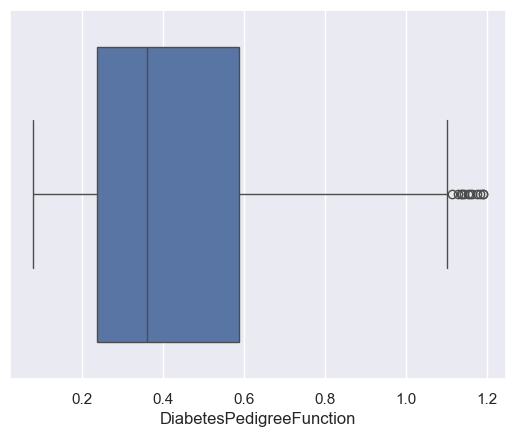

In [19]:
sns.boxplot(x=df['DiabetesPedigreeFunction'])

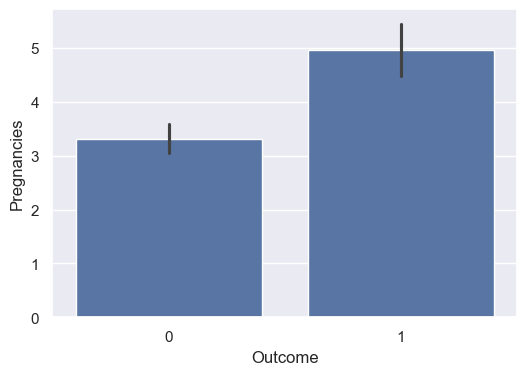

In [20]:
plt.figure(figsize=(6,4))

sns.set_theme(style = 'darkgrid')

sns.barplot(data = df, x = 'Outcome', y='Pregnancies')  

plt.show()


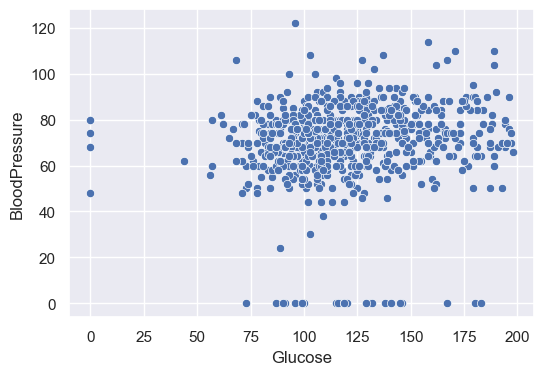

In [21]:
plt.figure(figsize=(6,4))
sns.set_theme(style = 'darkgrid')
sns.scatterplot(data = df, x = 'Glucose', y='BloodPressure')  

plt.show()


<Axes: >

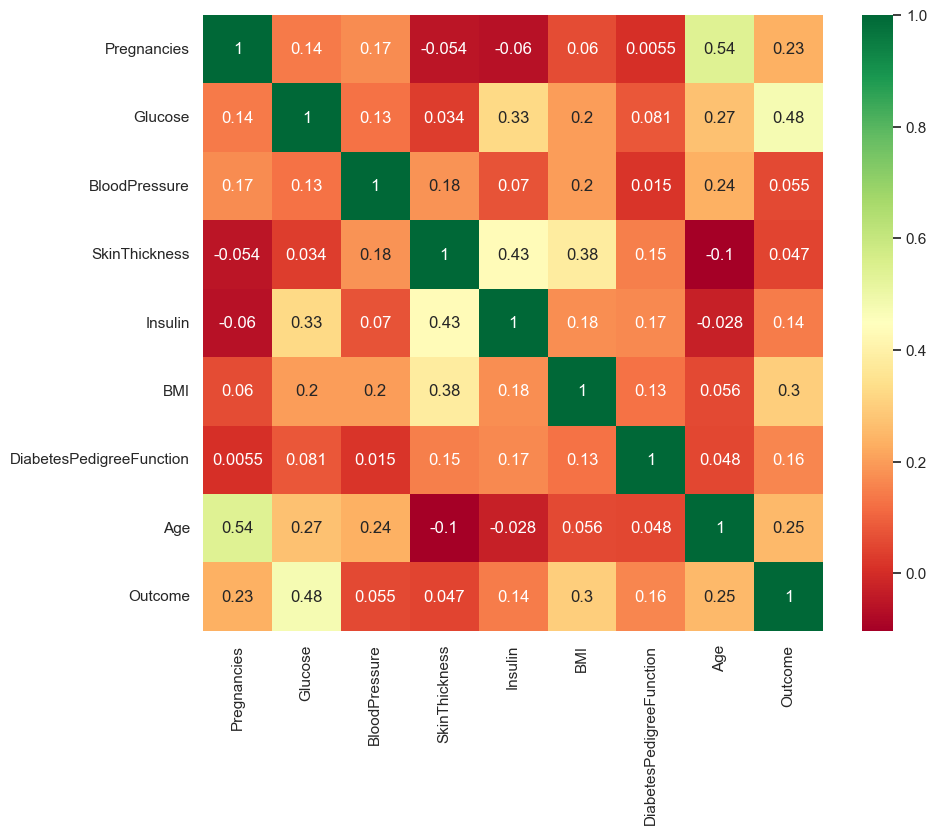

In [41]:
plt.figure(figsize=(10,8)) 
# seaborn has an easy method to showcase heatmap 
sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

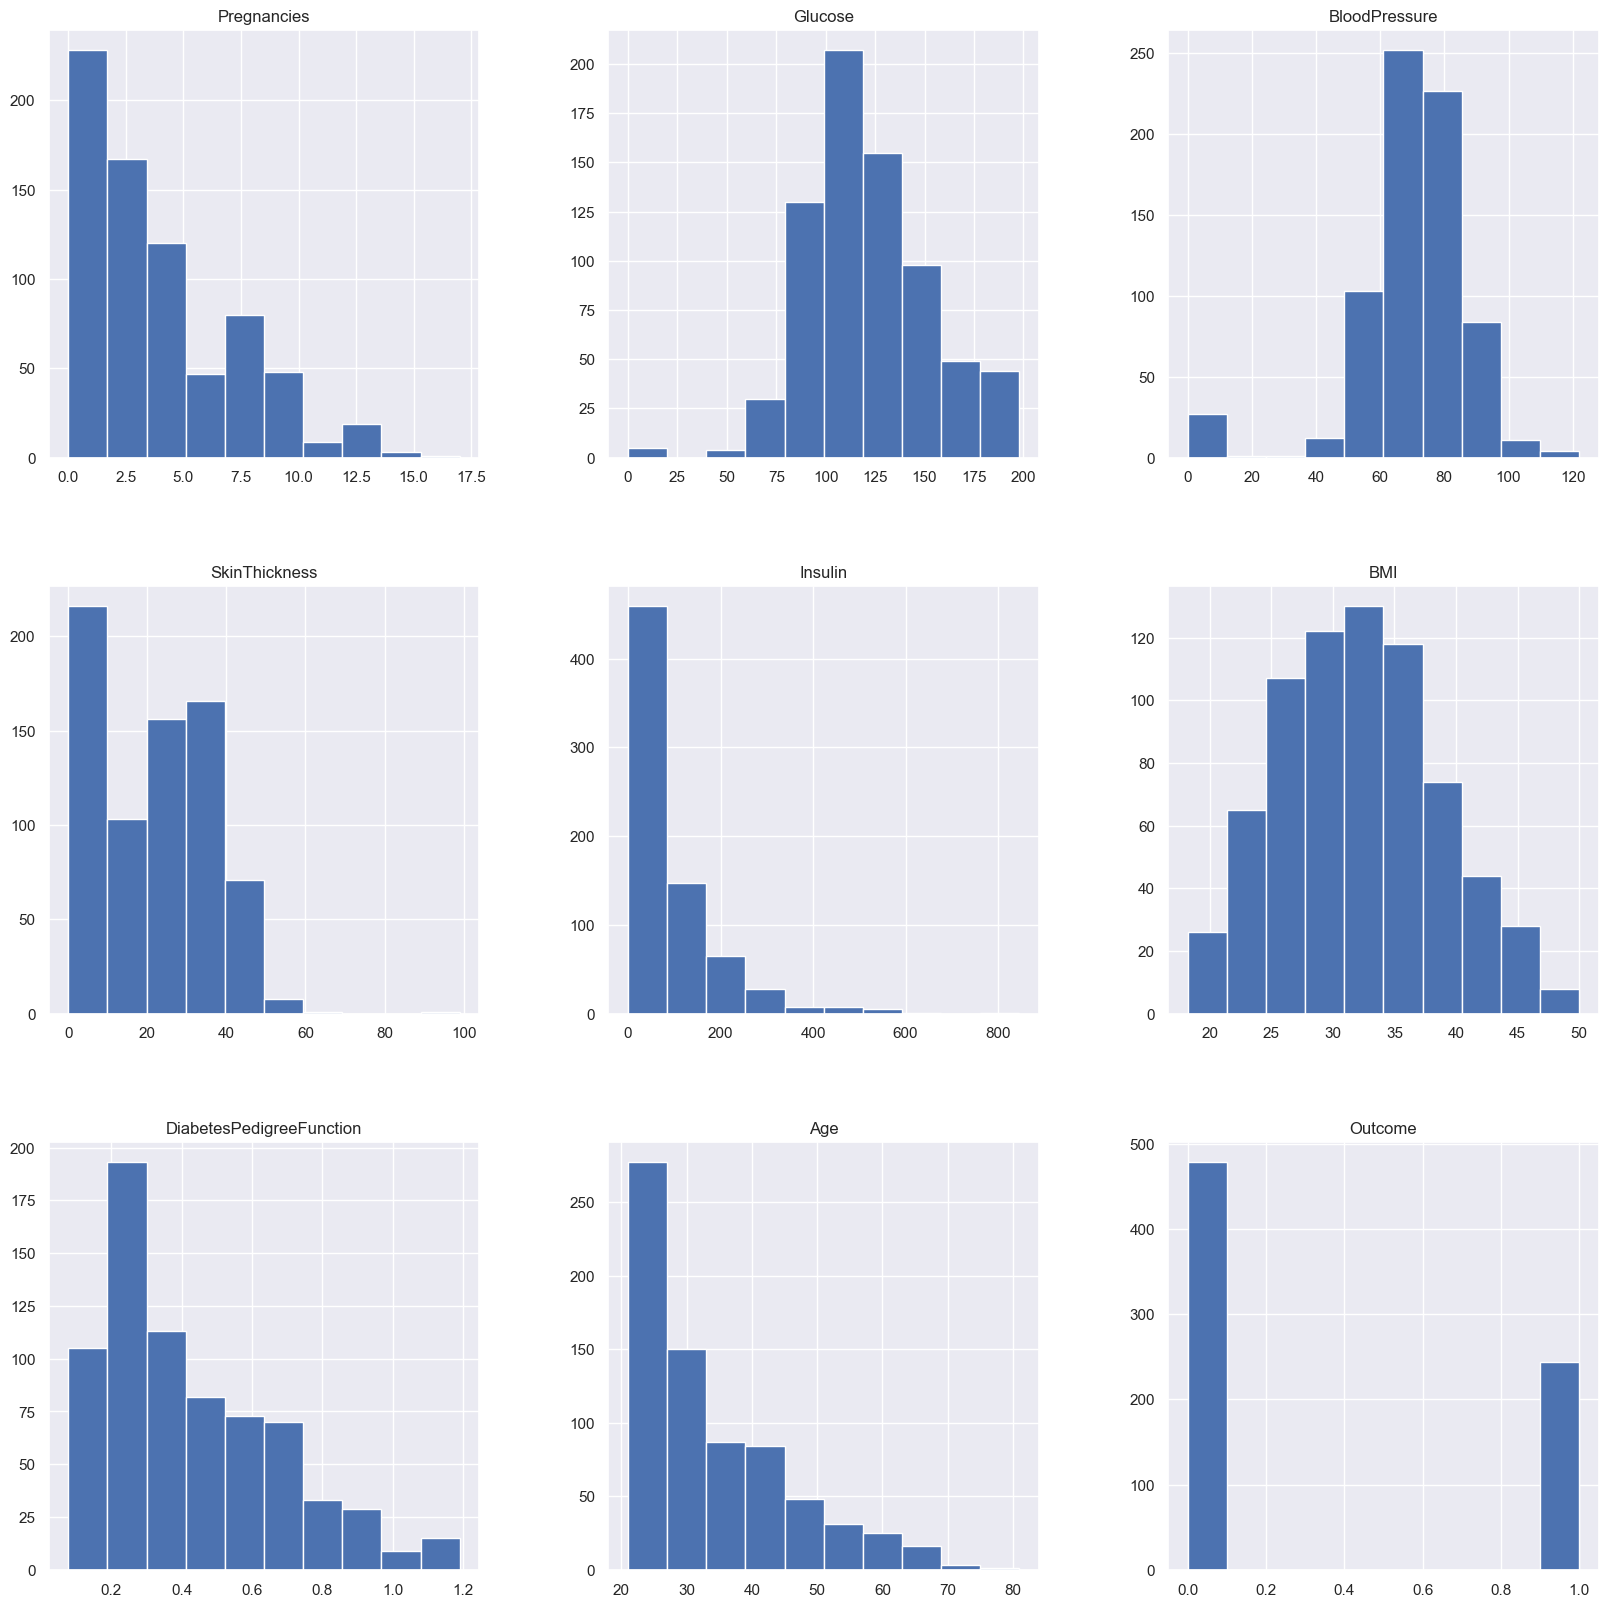

In [40]:
df.hist(figsize = (20,20))

### Target Column Distribution 

<Axes: xlabel='Outcome'>

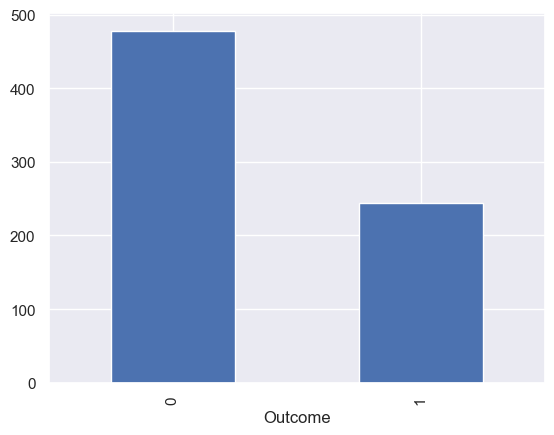

In [39]:
df.Outcome.value_counts().plot(kind='bar')

### Data Prepration

In [44]:
## df.replace({'Outcome':{'At Risk': 1,'Not at Risk': 0}})

X = df.drop('Outcome',axis= 1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [45]:
y = df['Outcome']
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 722, dtype: int64

### Feature scaling or Standardization 

In [52]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),
                        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])


In [54]:
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.632495,0.867998,0.133949,0.923327,-0.705928,0.223246,0.784802,1.420265
1,-0.854034,-1.118705,-0.196687,0.543077,-0.705928,-0.855421,-0.318464,-0.196329
2,1.227107,1.971722,-0.306899,-1.294800,-0.705928,-1.363936,0.964683,-0.111245
3,-0.854034,-0.992566,-0.196687,0.162827,0.140283,-0.624278,-1.053975,-1.047169
4,0.335190,-0.141121,0.244160,-1.294800,-0.705928,-1.009517,-0.918066,-0.281413


### Splitting the data into Train Test splits

In [68]:
 X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2)

### Checking for the best features

In [56]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [57]:
rfe = RFE(estimator = DecisionTreeClassifier(), n_features_to_select= 5)
rfe.fit(X_scaled,y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [58]:
for i, col in zip(range(X.shape[1]), X.columns):
    print(f"{col} select = {rfe.support_[i]} rank = {rfe.ranking_[i]}")

Pregnancies select = False rank = 2
Glucose select = True rank = 1
BloodPressure select = True rank = 1
SkinThickness select = False rank = 4
Insulin select = False rank = 3
BMI select = True rank = 1
DiabetesPedigreeFunction select = True rank = 1
Age select = True rank = 1


## Building the models

In [59]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test,rfc_pred)
print("Random Forest Accuracy : ",rfc_accuracy)

Random Forest Accuracy :  0.7517241379310344


In [60]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
dtc_accuracy = accuracy_score(y_test,dtc_pred)
print(" Decision Tree Accuracy : ",dtc_accuracy)

 Decision Tree Accuracy :  0.7034482758620689


In [61]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test,nb_pred)
print("Naive Bayes Accuracy : ",nb_accuracy)

Naive Bayes Accuracy :  0.7793103448275862


In [62]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
KNN_pred = KNN.predict(X_test)
KNN_accuracy = accuracy_score(y_test,KNN_pred)
print("K Nearest Neighbours Accuracy : ",KNN_accuracy)

K Nearest Neighbours Accuracy :  0.7310344827586207


In [63]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_pred)
print("Support Vector Classifier : ",svc_accuracy)

Support Vector Classifier :  0.7310344827586207


In [64]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test,lr_pred)
print("Logistic Regression Accuracy",lr_accuracy)

Logistic Regression Accuracy 0.7724137931034483


## Applying the feature selection to dataset

In [66]:
# applying the Feature elimination 

X1 = X_scaled.drop(['Pregnancies','SkinThickness','Insulin'],axis= 1)
X1.head()

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0.867998,0.133949,0.223246,0.784802,1.420265
1,-1.118705,-0.196687,-0.855421,-0.318464,-0.196329
2,1.971722,-0.306899,-1.363936,0.964683,-0.111245
3,-0.992566,-0.196687,-0.624278,-1.053975,-1.047169
4,-0.141121,0.244160,-1.009517,-0.918066,-0.281413


In [73]:
 X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y,test_size = 0.2)

In [74]:
rfc = RandomForestClassifier()
rfc.fit(X1_train,y1_train)
rfc_pred = rfc.predict(X1_test)
rfc_accuracy = accuracy_score(y1_test,rfc_pred)
print("Random Forest Accuracy : ",rfc_accuracy)

Random Forest Accuracy :  0.7448275862068966


In [75]:
lr = LogisticRegression()
lr.fit(X1_train,y1_train)
lr_pred = lr.predict(X1_test)
lr_accuracy = accuracy_score(y1_test,lr_pred)
print("Logistic Regression Accuracy",lr_accuracy)

Logistic Regression Accuracy 0.8


In [76]:
svc = SVC()
svc.fit(X1_train,y1_train)
svc_pred = svc.predict(X1_test)
svc_accuracy = accuracy_score(y_test,svc_pred)
print("Support Vector Classifier : ",svc_accuracy)

Support Vector Classifier :  0.7862068965517242


In [77]:
KNN = KNeighborsClassifier()
KNN.fit(X1_train,y1_train)
KNN_pred = KNN.predict(X1_test)
KNN_accuracy = accuracy_score(y1_test,KNN_pred)
print("K Nearest Neighbours Accuracy : ",KNN_accuracy)

K Nearest Neighbours Accuracy :  0.7310344827586207


In [79]:
dtc = DecisionTreeClassifier()
dtc.fit(X1_train,y1_train)
dtc_pred = dtc.predict(X1_test)
dtc_accuracy = accuracy_score(y1_test,dtc_pred)
print(" Decision Tree Accuracy : ",dtc_accuracy)

 Decision Tree Accuracy :  0.7103448275862069


## K-fold cross validation based 

In [81]:
dtc = DecisionTreeClassifier()
dtc_score = cross_val_score(dtc,X1,y,cv=5)
print('Decision Tree accuracy:',dtc_score.mean())

rfc = RandomForestClassifier()
rfc_score = cross_val_score(rfc,X1,y,cv=5)
print('Randiom forest accuracy:',rfc_score.mean())

nb = GaussianNB()
nb_score = cross_val_score(nb,X1,y,cv=5)
print('Naive Bayesaccuracy:',nb_score.mean())

knn = KNeighborsClassifier()
knn_score = cross_val_score(knn,X1,y,cv=5)
print('KNN accuracy:',knn_score.mean())

svc = SVC()
svc_score = cross_val_score(svc,X1,y,cv=5)
print('SVC accuracy:',svc_score.mean())

lr = LogisticRegression()
lr_score = cross_val_score(lr,X1,y,cv=5)
print('Logistic Regression accuracy:',lr_score.mean())

Decision Tree accuracy: 0.7065134099616859
Randiom forest accuracy: 0.7784961685823755
Naive Bayesaccuracy: 0.7770306513409961
KNN accuracy: 0.7563409961685823
SVC accuracy: 0.7881800766283525
Logistic Regression accuracy: 0.7811685823754789


## Parameter tuning to get the performance of the model

In [82]:
classifiers = {
    'DecisionTree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Gaussian Naive Bayes':GaussianNB(),
    'K-Nearest Neighbors':KNeighborsClassifier(),
    'Support Vector classifier':SVC(),
    'Logistic Regression':LogisticRegression()
}

In [83]:
param_grids= {
    'DecisionTree':{'max_depth':[3,4,5,6,7]},
    'Random Forest':{'n_estimators':[50,100,200],'max_depth':[3,4,5,6,7]},
    'Gaussian Naive Bayes':{},
    'K-Nearest Neighbors':{'n_neighbors':[3,5,7]},
    'Support Vector classifier':{'C':[0.1,1.10],'gamma':[0.1,0.01,0.001],'kernel':['rbf']},
    'Logistic Regression':{'C':[0.1,1.10]}
                         
}

In [84]:
results = {}

for name,clf in classifiers.items():
    print(f"Performing GridSearCV for {name}...")
    grid_search = GridSearchCV(clf, param_grid = param_grids[name],cv =7,scoring='accuracy')
    grid_search.fit(X_train,y_train)
    results[name] = {
        'Best Parameters':grid_search.best_params_,
        'Best Score':grid_search.best_score_,
        'Best Classifier':grid_search.best_estimator_
    }

Performing GridSearCV for DecisionTree...
Performing GridSearCV for Random Forest...
Performing GridSearCV for Gaussian Naive Bayes...
Performing GridSearCV for K-Nearest Neighbors...
Performing GridSearCV for Support Vector classifier...
Performing GridSearCV for Logistic Regression...


In [85]:
for name,result in results.items():
    print(f"{name}:")
    print(f"Best Parameters:{result['Best Parameters']}")
    print(f"Best Score:{result['Best Score']}")
    print(f"Best Classifier:{result['Best Classifier']}")
    print("\n")

DecisionTree:
Best Parameters:{'max_depth': 3}
Best Score:0.751983543931825
Best Classifier:DecisionTreeClassifier(max_depth=3)


Random Forest:
Best Parameters:{'max_depth': 6, 'n_estimators': 200}
Best Score:0.7935645019100793
Best Classifier:RandomForestClassifier(max_depth=6, n_estimators=200)


Gaussian Naive Bayes:
Best Parameters:{}
Best Score:0.7780319885815038
Best Classifier:GaussianNB()


K-Nearest Neighbors:
Best Parameters:{'n_neighbors': 7}
Best Score:0.7573359640653206
Best Classifier:KNeighborsClassifier(n_neighbors=7)


Support Vector classifier:
Best Parameters:{'C': 1.1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score:0.786700810209479
Best Classifier:SVC(C=1.1, gamma=0.01)


Logistic Regression:
Best Parameters:{'C': 1.1}
Best Score:0.7763108181856344
Best Classifier:LogisticRegression(C=1.1)




In [89]:
def plot_confusion_matrix(cm,classes,title):
    plt.figure(figsize = (8,6))
    sns.heatmap(cm,annot = True,cmap = 'Blues',xticklabels = classes,yticklabels=classes)
    plt.xlabel("Predicted labels")
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()
    

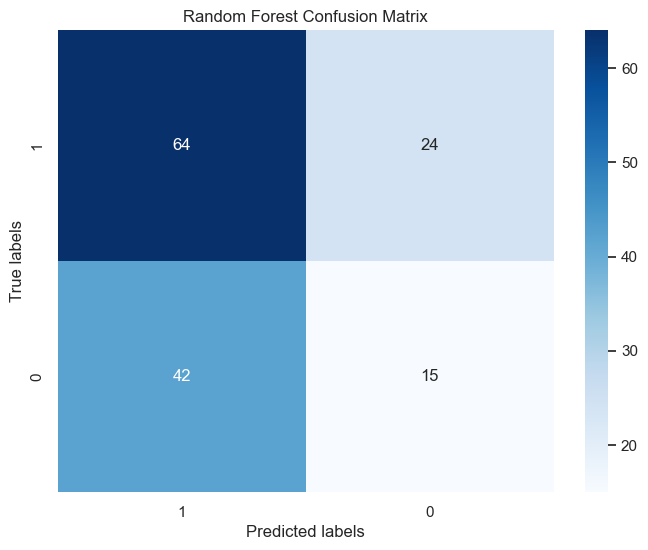

In [95]:
rfc_cm = confusion_matrix(y_test,rfc_pred)
plot_confusion_matrix(rfc_cm,df['Outcome'].unique(),title = "Random Forest Confusion Matrix")
